In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))


['test', 'train', 'train.csv', 'sample_submission.csv']


In [2]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [3]:
train_dir = "../input/train/train/"
test_dir = "../input/test/test/"
train_labels=pd.read_csv("../input/train.csv")
print(train_labels.shape)
print(train_labels['has_cactus'].value_counts())

(17500, 2)
1    13136
0     4364
Name: has_cactus, dtype: int64


In [4]:
label=[]
image_feature = []
image_id=train_labels['id']
for i in image_id:
    img=image.load_img(train_dir+i, target_size=(32,32,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    image_feature.append(img)
    label.append(train_labels[train_labels['id'] == i]['has_cactus'].values[0])


In [5]:
print("tag length:",len(label))
print("Total Images: ",len(image_feature))
list_of_tuples=list(zip(image_feature,label))
df = pd.DataFrame(list_of_tuples, columns = ['img', 'label'])
print(df.shape)

tag length: 17500
Total Images:  17500
(17500, 2)


In [6]:
X = np.array(image_feature)
y=pd.get_dummies(df['label']).values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print("Train Images:",X_train.shape[0])
print("Test Images:",X_test.shape[0])

Train Images: 14000
Test Images: 3500


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [14]:
history=model.fit(X_train, y_train, epochs=20)

Epoch 1/20
14000/14000 [==============================] - 2s 157us/step - loss: 0.0545 - acc: 0.9796
Epoch 2/20
14000/14000 [==============================] - 2s 136us/step - loss: 0.0501 - acc: 0.9811
Epoch 3/20
14000/14000 [==============================] - 2s 130us/step - loss: 0.0497 - acc: 0.9805
Epoch 4/20
14000/14000 [==============================] - 2s 131us/step - loss: 0.0402 - acc: 0.9866
Epoch 5/20
14000/14000 [==============================] - 2s 131us/step - loss: 0.0329 - acc: 0.9882
Epoch 6/20
14000/14000 [==============================] - 2s 131us/step - loss: 0.0310 - acc: 0.9889
Epoch 7/20
14000/14000 [==============================] - 2s 131us/step - loss: 0.0304 - acc: 0.9881
Epoch 8/20
14000/14000 [==============================] - 2s 132us/step - loss: 0.0234 - acc: 0.9924
Epoch 9/20
14000/14000 [==============================] - 2s 132us/step - loss: 0.0242 - acc: 0.9914
Epoch 10/20
14000/14000 [==============================] - 2s 132us/step - loss: 0.0185 - a

In [15]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Test Accuracy:acc: 98.51%


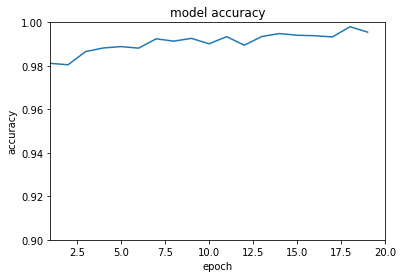

In [20]:
#  "Accuracy"
plt.ylim(0.90,1)
plt.xlim(1,20)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

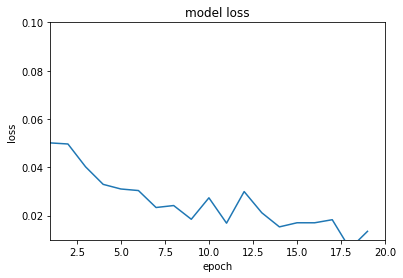

In [22]:
#  "LOSS"
plt.ylim(0.01,0.1)
plt.xlim(1,20)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [23]:
submission=pd.read_csv("../input/sample_submission.csv")
image_feature = []
image_id=submission['id']

In [24]:
for i in image_id:
    img=cv2.imread(test_dir + i)
    img = image.img_to_array(img)
    img = img/255
    image_feature.append(img)
    
print("Total Images: ",len(image_feature))

Total Images:  4000


In [25]:
Y = np.array(image_feature)
y_pred=model.predict_classes(Y)
print("Predicted classes:",y_pred)

Predicted classes: [1 1 0 ... 1 1 1]


In [26]:
sub_data=pd.DataFrame({'id':image_id })
sub_data['has_cactus']=y_pred
sub_data.to_csv("submissions.csv",index=False)